#### Exercise 1d - ADAgrad

In this notebook, we implement the Adagrad gradient descent method. 

In [421]:
import numpy as np

def RMSprop(eta,eps,rho,gradient,theta_0,N_iterations = 10000): 
    theta = theta_0.copy()
    n = 0
    r = 0

    new_grad = gradient(theta)
    r = np.zeros(len(new_grad))
    error = 1e-12

    while np.linalg.norm(new_grad) >= eps and n < N_iterations: 
        r = rho*r + (1 - rho)*new_grad * new_grad
        theta -= (eta/(np.sqrt(error + r)))*new_grad
        new_grad = gradient(theta)
        n += 1
        
    return theta

def Adagrad(eta,eps,gradient,theta_0,N_iterations = 10000): 
    theta = theta_0.copy()
    n = 0
    r = 0

    new_grad = gradient(theta)
    r = np.zeros(len(new_grad))
    error = 1e-12

    while np.linalg.norm(new_grad) >= eps and n < N_iterations: 
        r += new_grad * new_grad
        theta -= (eta/(np.sqrt(error + r)))*new_grad
        new_grad = gradient(theta)
        n += 1
        
    return theta


def GD(eta,eps,gradient,theta_0,N_iterations = 5000, momentum=0.0): 
    theta = theta_0.copy()
    n = 0
    change = 0
    new_gradient = gradient(theta)

    while np.linalg.norm(new_gradient) >= eps and n < N_iterations: 
        change = eta * new_gradient + momentum * change
        theta -= change
        n += 1

        new_gradient = gradient(theta)

    return theta

def ADAM(eta,eps,gradient,theta_0,beta_1=0.9,beta_2=0.999,N_iterations = 10000): 
    theta = theta_0.copy()
    n = 1
    m = 0
    v = 0

    new_grad = gradient(theta)
    r = np.zeros(len(new_grad))
    error = 1e-12

    while np.linalg.norm(new_grad) >= eps and n < N_iterations: 
        m = beta_1*m + (1 - beta_1)*new_grad
        v = beta_2*v + (1 - beta_2)*new_grad*new_grad
        m = m/(1 - beta_1**n)
        v = v/(1 - beta_2**n)
        theta -= (eta/(np.sqrt(v) + error))*m
        new_grad = gradient(theta)
        n += 1
        
    return theta

##### Testing the ADAgrad method

In [422]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [423]:
# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)

In [424]:
n = 100
x = np.random.uniform(-1, 1, n)
y = f(x) + 0.025*np.random.normal(0, 1, n)

In [425]:
def polynomial_features(x, p, intercept = False):
    n = len(x)
    if intercept:
        X = np.zeros((n,p+1))
        for i in range(p+1):
            X[:, i] = x**i
    else:
        X = np.zeros((n, p))
        for i in range(1, p + 1):
            X[:, i - 1] = x ** i
    return X

In [426]:
def MSE(y, y_pred):
    return 1/n * np.sum((y-y_pred)**2)

def R2(y, y_pred):
    return 1 - np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2)

In [427]:
def MSE_gradient(X,y,theta):
    return -2*X.T @ (y - X @ theta)

In [428]:
MAX_POLYNOMIAL_DEGREE = 20
MIN_POLYNOMIAL_DEGREE = 2

#mse_values = np.zeros(MAX_POLYNOMIAL_DEGREE-MIN_POLYNOMIAL_DEGREE+1)
#r2_values = np.zeros(MAX_POLYNOMIAL_DEGREE-MIN_POLYNOMIAL_DEGREE+1)

polynomial_degrees = list(range(MIN_POLYNOMIAL_DEGREE, MAX_POLYNOMIAL_DEGREE+1))

eta = 0.1
eps = 0.00001
rho = 0.99


def MSE_and_R2(x,polynomial_degrees,regression_type="OLS",lamb = 0.0): 
    theta_val = []
    mse_values = np.zeros(polynomial_degrees[-1] - polynomial_degrees[0]+1)
    r2_values = np.zeros(polynomial_degrees[-1] - polynomial_degrees[0]+1)
    for p in polynomial_degrees:
        X = polynomial_features(x, p,intercept=True)
        gradient = lambda theta: MSE_gradient(X,y,theta)
        theta_0 = np.random.uniform(-1,1,p+1)
        theta = ADAM(eta,eps,gradient = gradient,theta_0 = theta_0)
        theta_val.append(theta)
        y_pred = X @ theta
        ols_mse = MSE(y, y_pred)
        ols_r2 = R2(y, y_pred)
        mse_values[p-polynomial_degrees[0]] = ols_mse
        r2_values[p-polynomial_degrees[0]] = ols_r2
    return mse_values,r2_values,theta_val

C:\Users\frede\AppData\Local\Temp\ipykernel_7160\1073910046.py:67: RuntimeWarning: overflow encountered in divide
  v = v/(1 - beta_2**n)


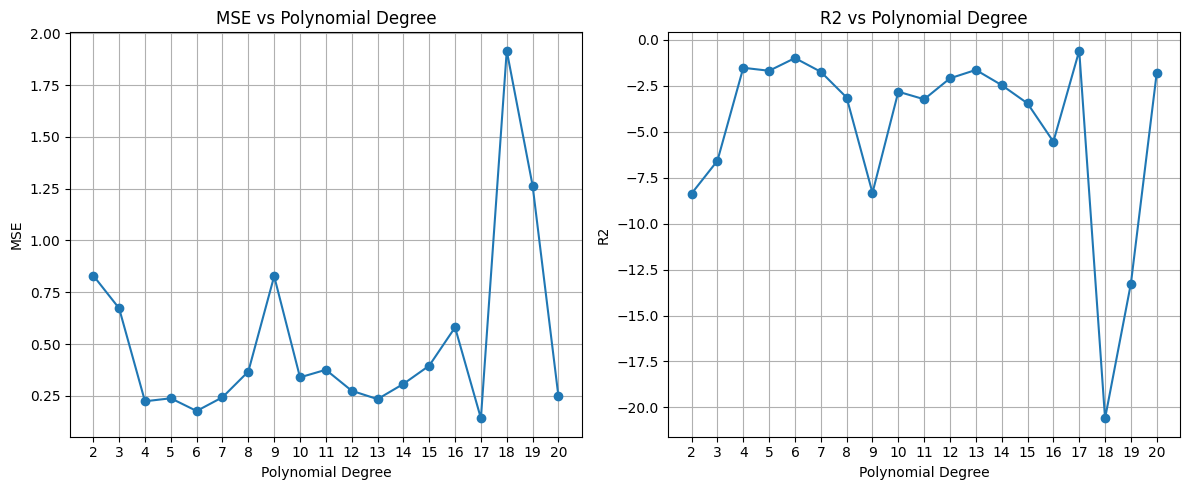

In [429]:
mse_values,r2_values,theta_val = MSE_and_R2(x,polynomial_degrees)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(polynomial_degrees, mse_values, marker='o')
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.xticks(polynomial_degrees)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(polynomial_degrees, r2_values, marker='o')
plt.title('R2 vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.xticks(polynomial_degrees)
plt.grid()

plt.tight_layout()
plt.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_7160\2739972770.py:2: RuntimeWarning: overflow encountered in matmul
  return -2*X.T @ (y - X @ theta)
C:\Users\frede\AppData\Local\Temp\ipykernel_7160\2739972770.py:2: RuntimeWarning: invalid value encountered in matmul
  return -2*X.T @ (y - X @ theta)


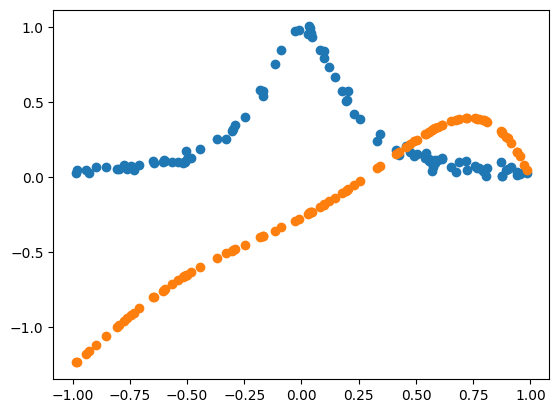

In [430]:
X = polynomial_features(x, 5,intercept=True)
gradient = lambda theta: MSE_gradient(X,y,theta)
theta_0 = np.random.uniform(-1,1,5+1)
theta = GD(eta,eps,gradient,theta_0)

plt.scatter(x, y) 
plt.scatter(x, X @ theta_0)
plt.scatter(x, X @ theta)
plt.show()

Optimal values: 

-Adagrad: eta = 5, eps = 0.00001

-Grad with or without momentum: eta = 0.001

-RMSprop: eta = 0.01, rho = 0.99

